# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [ ]:
import pandas as pd
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
query = "gato"
# Representación TF
all_docs = documents + [query]
vocabulario = set()
for doc in all_docs:
    for word in doc.lower().strip('.').split():
        vocabulario.add(word)
print(vocabulario)
print(len(vocabulario))
i=0
dict_tf = {}
for doc in all_docs:
# Representación TF-IDF
    dict_tfd={}
    for term in vocabulario:
        count=doc.lower().strip('.').count(term)
        dict_tfd[term]=count
        #if term in doc:
    print(doc,dict_tfd)
    dict_tf[i]=dict_tfd
    i+=1
print(dict_tf)            
matriz=pd.DataFrame(dict_tf)
matriz.T

{'cómoda', 'gato', 'el', 'jardín', 'es', 'limpia', 'cama', 'jugaron', 'escondió', 'en', 'de', 'la', 'estaba', 'limpieza', 'se', 'debajo', 'del', 'perro', 'y', 'importante'}
20
El gato se escondió debajo de la cama. {'cómoda': 0, 'gato': 1, 'el': 1, 'jardín': 0, 'es': 1, 'limpia': 0, 'cama': 1, 'jugaron': 0, 'escondió': 1, 'en': 0, 'de': 2, 'la': 1, 'estaba': 0, 'limpieza': 0, 'se': 1, 'debajo': 1, 'del': 0, 'perro': 0, 'y': 0, 'importante': 0}
La cama estaba limpia y cómoda. {'cómoda': 1, 'gato': 0, 'el': 0, 'jardín': 0, 'es': 1, 'limpia': 1, 'cama': 1, 'jugaron': 0, 'escondió': 0, 'en': 0, 'de': 0, 'la': 1, 'estaba': 1, 'limpieza': 0, 'se': 0, 'debajo': 0, 'del': 0, 'perro': 0, 'y': 1, 'importante': 0}
El perro y el gato jugaron en el jardín. {'cómoda': 0, 'gato': 1, 'el': 3, 'jardín': 1, 'es': 0, 'limpia': 0, 'cama': 0, 'jugaron': 1, 'escondió': 0, 'en': 1, 'de': 0, 'la': 0, 'estaba': 0, 'limpieza': 0, 'se': 0, 'debajo': 0, 'del': 0, 'perro': 1, 'y': 1, 'importante': 0}
La limpieza d

,cómoda,gato,el,jardín,es,limpia,cama,jugaron,escondió,en,de,la,estaba,limpieza,se,debajo,del,perro,y,importante
0,0,1,1,0,1,0,1,0,1,0,2,1,0,0,1,1,0,0,0,0
1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0
2,0,1,3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
matriz.to_csv('matriz_tf.csv', index=True)

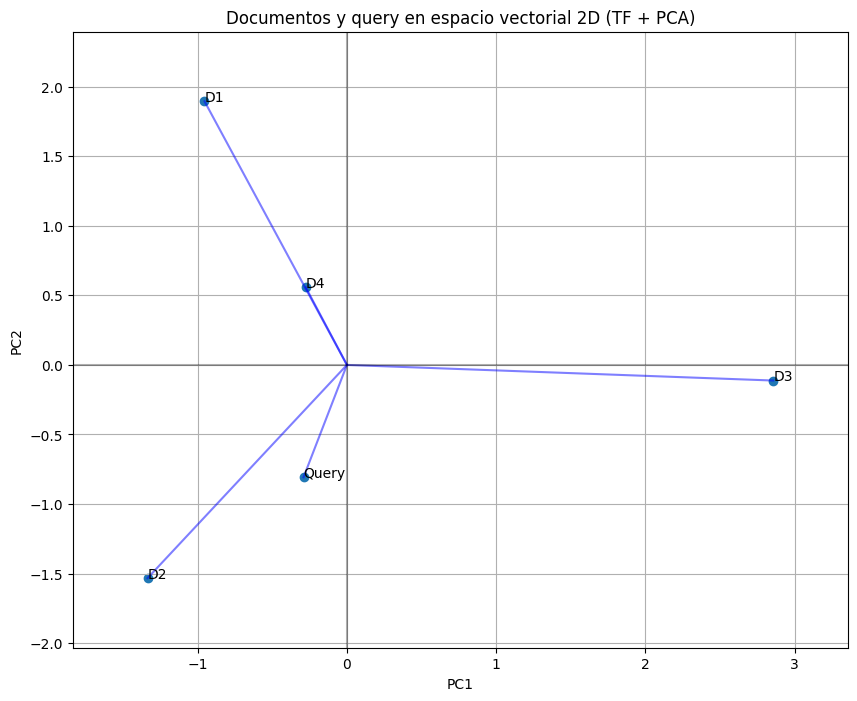

In [ ]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)
plt.figure(figsize=(10, 8))
for i in range(len(docs_2d)):
    plt.plot([0, docs_2d[i,0]], [0, docs_2d[i,1]], 'b-', alpha=0.5)
plt.scatter(docs_2d[:,0], docs_2d[:,1])
labels = ["D1", "D2", "D3", "D4", "Query"]
for i, txt in enumerate(labels):
    plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))
plt.title("Documentos y query en espacio vectorial 2D (TF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
margin = 0.5
x_min, x_max = min(docs_2d[:,0]), max(docs_2d[:,0])
y_min, y_max = min(docs_2d[:,1]), max(docs_2d[:,1])
plt.xlim(min(-margin, x_min - margin), max(margin, x_max + margin))
plt.ylim(min(-margin, y_min - margin), max(margin, y_max + margin))
plt.show()

## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

Vocabulario: {'debajo', 'la', 'y', 'importante', 'en', 'jardín', 'limpia', 'es', 'estaba', 'cama', 'cómoda', 'del', 'jugaron', 'perro', 'gato', 'limpieza', 'se', 'el', 'de', 'escondió'}
Número de términos: 20
Similitud coseno entre Query y Documento 1: 0.2041
Similitud coseno entre Query y Documento 2: 0.0000
Similitud coseno entre Query y Documento 3: 0.4472
Similitud coseno entre Query y Documento 4: 0.2357

Ranking de documentos por relevancia:
1. Documento 3 (Similitud: 0.4472): El perro y el gato jugaron en el jardín.
2. Documento 4 (Similitud: 0.2357): La limpieza del jardín es importante.
3. Documento 1 (Similitud: 0.2041): El gato se escondió debajo de la cama.
4. Documento 2 (Similitud: 0.0000): La cama estaba limpia y cómoda.


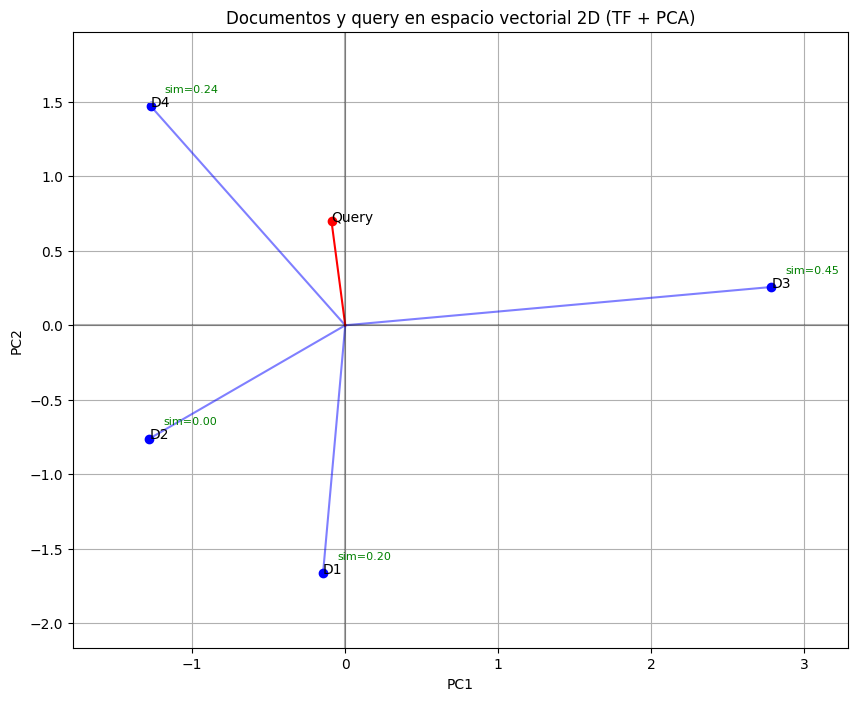

,debajo,la,y,importante,en,jardín,limpia,es,estaba,cama,cómoda,del,jugaron,perro,gato,limpieza,se,el,de,escondió
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1
1,0,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,3,0,0
3,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
query = "gato en jardín"
all_docs = documents + [query]
vocabulario = set()
for doc in all_docs:
    for word in doc.lower().strip('.').split():
        vocabulario.add(word)
print("Vocabulario:", vocabulario)
print("Número de términos:", len(vocabulario))
# 2. Representar la consulta en el mismo espacio vectorial
# Crear matriz TF para documentos y query
dict_tf = {}
for i, doc in enumerate(all_docs):
    dict_tfd = {}
    for term in vocabulario:
        words = doc.lower().strip('.').split()
        count = words.count(term)
        dict_tfd[term] = count
    dict_tf[i] = dict_tfd
matriz=pd.DataFrame(dict_tf)
matriz.T

def calcular_similitud_coseno(vec1, vec2):
    # Producto punto
    producto_punto = sum(a * b for a, b in zip(vec1, vec2))
    # Magnitud de vectores
    magnitud1 = math.sqrt(sum(a * a for a in vec1))
    magnitud2 = math.sqrt(sum(b * b for b in vec2))
    # Evitar división por cero
    if magnitud1 * magnitud2 == 0:
        return 0
    return producto_punto / (magnitud1 * magnitud2)
# Obtener vector de query
vec_query = matriz[len(all_docs)-1].values
# Calcular similitud con cada documento
similitudes = []
for i in range(len(documents)):
    vec_doc = matriz[i].values
    sim = calcular_similitud_coseno(vec_doc, vec_query)
    similitudes.append(sim)
    print(f"Similitud coseno entre Query y Documento {i+1}: {sim:.4f}")
# Ordenar documentos por relevancia
ranking = sorted(range(len(similitudes)), key=lambda i: similitudes[i], reverse=True)
print("\nRanking de documentos por relevancia:")
for i, idx in enumerate(ranking):
    print(f"{i+1}. Documento {idx+1} (Similitud: {similitudes[idx]:.4f}): {documents[idx]}")
# 4. Visualizar la consulta como un vector en el mismo espacio vectorial
# Reducción PCA
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)
plt.figure(figsize=(10, 8))
for i in range(len(docs_2d)):
    if i < len(documents):
        color = 'b'
        alpha = 0.5
    else:
        color = 'r' 
        alpha = 1.0
    plt.plot([0, docs_2d[i,0]], [0, docs_2d[i,1]], '-', color=color, alpha=alpha)

plt.scatter(docs_2d[:len(documents),0], docs_2d[:len(documents),1], color='blue')
plt.scatter(docs_2d[len(documents):,0], docs_2d[len(documents):,1], color='red')
labels = [f"D{i+1}" for i in range(len(documents))] + ["Query"]
for i, txt in enumerate(labels):
    plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))
for i in range(len(documents)):
    plt.annotate(f"sim={similitudes[i]:.2f}", 
                 (docs_2d[i,0], docs_2d[i,1]), 
                 xytext=(10, 10), 
                 textcoords='offset points',
                 fontsize=8,
                 color='green')
plt.title("Documentos y query en espacio vectorial 2D (TF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
margin = 0.5
x_min, x_max = min(docs_2d[:,0]), max(docs_2d[:,0])
y_min, y_max = min(docs_2d[:,1]), max(docs_2d[:,1])
plt.xlim(min(-margin, x_min - margin), max(margin, x_max + margin))
plt.ylim(min(-margin, y_min - margin), max(margin, y_max + margin))
plt.show()
matriz.T

## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

Consulta: 'el gato'

Ranking de documentos relevantes:
1. Documento 3 (sim=0.7303): El perro y el gato jugaron en el jardín.
2. Documento 1 (sim=0.5000): El gato se escondió debajo de la cama.
3. Documento 2 (sim=0.0000): La cama estaba limpia y cómoda.
4. Documento 4 (sim=0.0000): La limpieza del jardín es importante.

Visualizando vectores como flechas desde el origen...


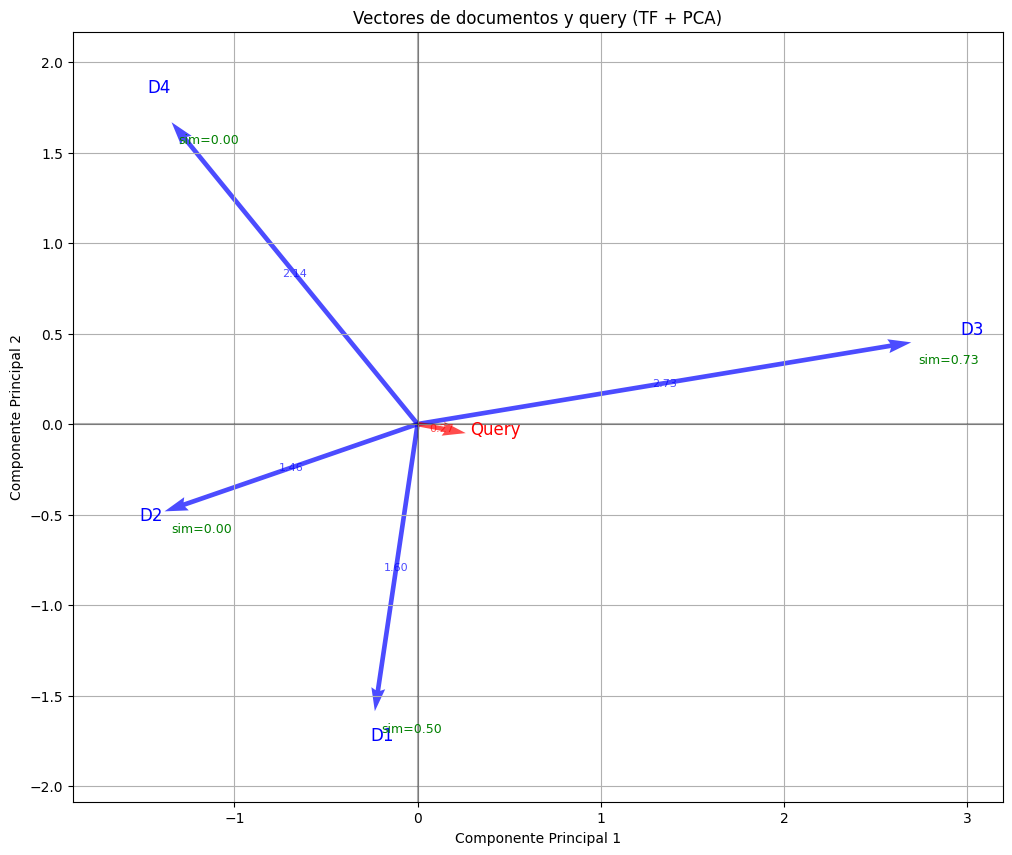

In [ ]:
def preprocesar_texto(texto):
    return texto.lower().strip('.').split()
def construir_vocabulario(documentos):
    vocab = set()
    for doc in documentos:
        for palabra in preprocesar_texto(doc):
            vocab.add(palabra)
    return vocab
def crear_matriz_tf(documentos, vocabulario):
    matriz = {}
    for i, doc in enumerate(documentos):
        palabras = preprocesar_texto(doc)
        vector = {}
        for termino in vocabulario:
            vector[termino] = palabras.count(termino)
        matriz[i] = vector
    return pd.DataFrame(matriz)
# 1. Función para encontrar documentos relevantes con similitud coseno
def buscar_documentos_relevantes(query, documentos, top_k=None):
    # Preparar documentos y consulta
    todos_docs = documentos + [query]
    vocabulario = construir_vocabulario(todos_docs)
    # Crear matriz TF
    matriz = crear_matriz_tf(todos_docs, vocabulario)
    similitudes = []
    vector_query = matriz[len(documentos)].values
    for i in range(len(documentos)):
        vector_doc = matriz[i].values
        # Producto punto
        dot_product = sum(a * b for a, b in zip(vector_doc, vector_query))
        # Magnitudes
        mag_doc = math.sqrt(sum(a * a for a in vector_doc))
        mag_query = math.sqrt(sum(b * b for b in vector_query))
        # Evitar división por cero
        if mag_doc * mag_query == 0:
            similitud = 0
        else:
            similitud = dot_product / (mag_doc * mag_query)
        similitudes.append((i, similitud, documentos[i]))
    # Ordenar por similitud (descendente)
    resultados = sorted(similitudes, key=lambda x: x[1], reverse=True)
    # Limitar resultados si se especifica top_k
    if top_k is not None:
        resultados = resultados[:top_k]
    return resultados
# 2. Función para visualizar vectores como flechas
def visualizar_vectores_documentos(documentos, query):
    todos_docs = documentos + [query]
    vocabulario = construir_vocabulario(todos_docs)
    matriz = crear_matriz_tf(todos_docs, vocabulario)
    # Aplicar PCA
    pca = PCA(n_components=2)
    coords_2d = pca.fit_transform(matriz.T)
    plt.figure(figsize=(12, 10))
    # Colores para los vectores (documentos en azul, query en rojo)
    colores = ['blue'] * len(documentos) + ['red']
    nombres = [f"D{i+1}" for i in range(len(documentos))] + ["Query"]
    # Dibujar flechas desde el origen usando quiver
    for i, (x, y) in enumerate(coords_2d):
        color = colores[i]
        # flechas
        plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, 
                   color=color, alpha=0.7, width=0.005)
        plt.text(x*1.1, y*1.1, nombres[i], fontsize=12, color=color)
        # Calcular magnitud del vector para mostrarla
        magnitud = np.sqrt(x**2 + y**2)
        plt.text(x*0.5, y*0.5, f"{magnitud:.2f}", fontsize=8, 
                 ha='center', va='center', color=color, alpha=0.7)
    # calcular y mostrar similitudes
    if query:
        resultados = buscar_documentos_relevantes(query, documentos)
        for i, (idx, sim, _) in enumerate(resultados):
            texto_sim = f"sim={sim:.2f}"
            x, y = coords_2d[idx]
            plt.annotate(texto_sim, (x, y), xytext=(5, -15), 
                         textcoords='offset points', fontsize=9, color='green')
    # Ajustar el gráfico
    plt.grid(True)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.title("Vectores de documentos y query (TF + PCA)")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    all_x = coords_2d[:, 0]
    all_y = coords_2d[:, 1]
    margen = 0.5
    plt.xlim(min(min(all_x) - margen, -margen), max(max(all_x) + margen, margen))
    plt.ylim(min(min(all_y) - margen, -margen), max(max(all_y) + margen, margen))
    
    plt.show()
    return coords_2d, resultados
query = "el gato"
print(f"Consulta: '{query}'")
resultados = buscar_documentos_relevantes(query, documents)
print("\nRanking de documentos relevantes:")
for i, (idx, similitud, texto) in enumerate(resultados):
    print(f"{i+1}. Documento {idx+1} (sim={similitud:.4f}): {texto}")
print("\nVisualizando vectores como flechas desde el origen...")
coords, _ = visualizar_vectores_documentos(documents, query)